In [182]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn 

In [183]:
df=pd.read_csv("balanc_diet.csv")

In [184]:
df.head()

,ID,Age,Gender,Working_Type,Sleep_Hours,Height_m,Required_Daily_Calories
0,5398,68.0,Female,Unemployed,6.627585,1.861374,1898.520157
1,3078,19.0,Female,Desk Job,5.671469,1.732762,2439.173224
2,6051,50.0,Female,Freelancer,7.060029,1.509387,1746.165518
3,6503,54.0,Male,Healthcare,4.154597,1.832796,2461.167138
4,3602,27.0,Female,Desk Job,3.847020,1.624670,2105.472452


In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10200 entries, 0 to 10199
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10200 non-null  int64  
 1   Age                      10171 non-null  float64
 2   Gender                   10200 non-null  object 
 3   Working_Type             10171 non-null  object 
 4   Sleep_Hours              10171 non-null  float64
 5   Height_m                 10171 non-null  float64
 6   Required_Daily_Calories  10171 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 557.9+ KB


In [186]:
sns.scatterplot(data=df, x='Age', y='Required_Daily_Calories_log', hue='Gender')

ValueError: Could not interpret value `Required_Daily_Calories_log` for `y`. An entry with this name does not appear in `data`.

In [187]:
df.shape

(10200, 7)

In [188]:
df.describe()

,ID,Age,Sleep_Hours,Height_m,Required_Daily_Calories
count,10200.000000,10171.000000,10171.000000,10171.000000,10171.000000
mean,5096.418039,43.839740,6.937515,1.726852,2306.216930
std,2943.782520,15.529117,1.766246,0.113953,436.078477
min,1.000000,10.000000,3.000000,1.300000,977.000000
25%,2549.750000,31.000000,5.453515,1.650000,2004.022713
50%,5090.500000,44.000000,6.945145,1.728573,2269.182960
75%,7647.250000,57.000000,8.425117,1.801288,2559.887235
max,10200.000000,74.000000,10.000000,2.095437,4000.000000


In [189]:
df['Required_Daily_Calories_log']=np.log(df['Required_Daily_Calories'])

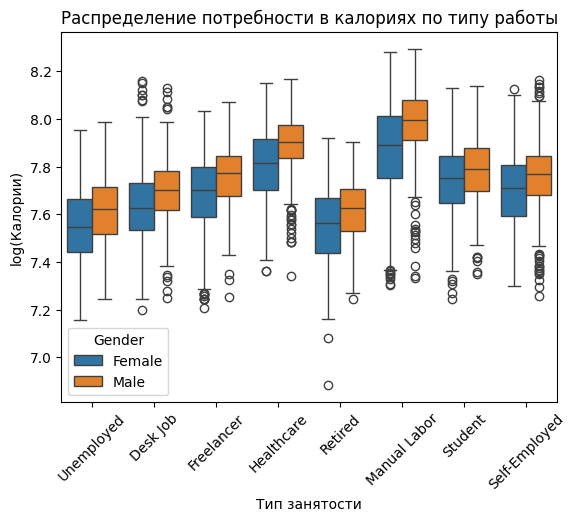

In [190]:
sns.boxplot(data=df, x='Working_Type', y='Required_Daily_Calories_log', hue='Gender')
plt.title("Распределение потребности в калориях по типу работы")
plt.xlabel("Тип занятости")
plt.ylabel("log(Калории)")
plt.xticks(rotation=45)
plt.show()

In [191]:
df1=df

In [192]:
df1

,ID,Age,Gender,Working_Type,Sleep_Hours,Height_m,Required_Daily_Calories,Required_Daily_Calories_log
0,5398,68.0,Female,Unemployed,6.627585,1.861374,1898.520157,7.548830
1,3078,19.0,Female,Desk Job,5.671469,1.732762,2439.173224,7.799414
2,6051,50.0,Female,Freelancer,7.060029,1.509387,1746.165518,7.465178
3,6503,54.0,Male,Healthcare,4.154597,1.832796,2461.167138,7.808391
4,3602,27.0,Female,Desk Job,3.847020,1.624670,2105.472452,7.652295
...,...,...,...,...,...,...,...,...
10195,3100,35.0,Female,Desk Job,8.164440,1.475782,2360.129593,7.766472
10196,6185,40.0,Male,Desk Job,8.251327,1.969487,2523.668562,7.833469
10197,3562,37.0,Male,Freelancer,7.691461,1.603877,2859.715104,7.958477
10198,5893,60.0,Female,Student,6.960608,1.552269,2455.459190,7.806069


In [193]:
def to_num(x:str)->int:
    if x=='Female':
        return 1
    else :
        return 0

In [194]:
df1['Gender_num'] = df1['Gender'].apply(to_num)

In [195]:
df1=df1.drop(columns='Gender')

In [196]:
df1=pd.get_dummies(df,'Working_Type')

In [197]:
df1

,ID,Age,Sleep_Hours,Height_m,Required_Daily_Calories,Required_Daily_Calories_log,Gender_num,Working_Type_Female,Working_Type_Male,Working_Type_Desk Job,Working_Type_Freelancer,Working_Type_Healthcare,Working_Type_Manual Labor,Working_Type_Retired,Working_Type_Self-Employed,Working_Type_Student,Working_Type_Unemployed
0,5398,68.0,6.627585,1.861374,1898.520157,7.548830,1,True,False,False,False,False,False,False,False,False,True
1,3078,19.0,5.671469,1.732762,2439.173224,7.799414,1,True,False,True,False,False,False,False,False,False,False
2,6051,50.0,7.060029,1.509387,1746.165518,7.465178,1,True,False,False,True,False,False,False,False,False,False
3,6503,54.0,4.154597,1.832796,2461.167138,7.808391,0,False,True,False,False,True,False,False,False,False,False
4,3602,27.0,3.847020,1.624670,2105.472452,7.652295,1,True,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10195,3100,35.0,8.164440,1.475782,2360.129593,7.766472,1,True,False,True,False,False,False,False,False,False,False
10196,6185,40.0,8.251327,1.969487,2523.668562,7.833469,0,False,True,True,False,False,False,False,False,False,False
10197,3562,37.0,7.691461,1.603877,2859.715104,7.958477,0,False,True,False,True,False,False,False,False,False,False
10198,5893,60.0,6.960608,1.552269,2455.459190,7.806069,1,True,False,False,False,False,False,False,False,True,False


<Axes: xlabel='Required_Daily_Calories', ylabel='Count'>

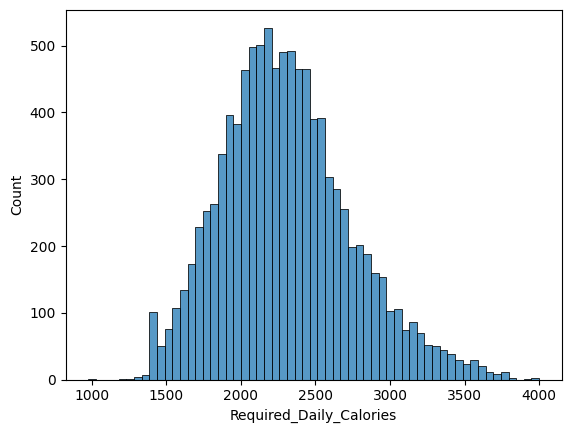

In [198]:
sns.histplot(data=df1['Required_Daily_Calories'])

<Axes: xlabel='Required_Daily_Calories_log', ylabel='Count'>

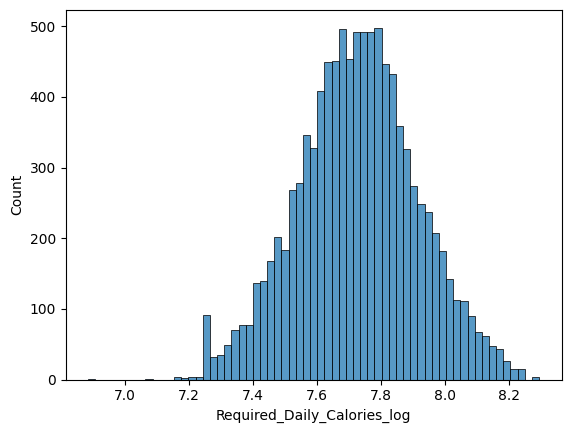

In [199]:
sns.histplot(data=df1['Required_Daily_Calories_log'])

In [200]:
df1.groupby('Gender_num',as_index=False).agg({'Age':'count'})

,Gender_num,Age
0,0,5089
1,1,5082


<Axes: xlabel='Height_m', ylabel='Required_Daily_Calories_log'>

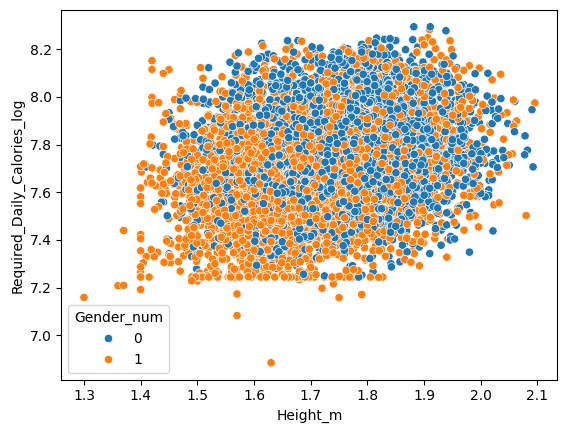

In [201]:
sns.scatterplot(data=df1, x='Height_m', y='Required_Daily_Calories_log', hue='Gender_num')

<Axes: xlabel='Sleep_Hours', ylabel='Required_Daily_Calories_log'>

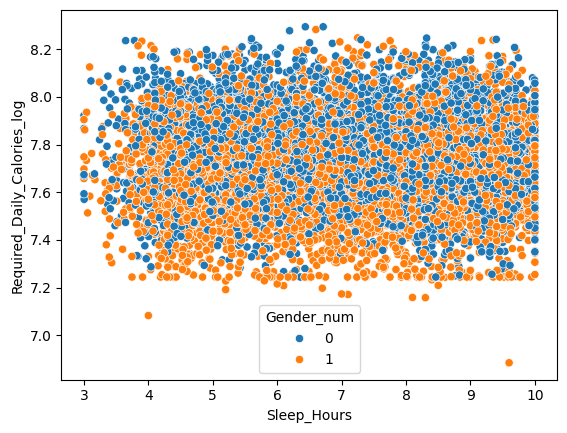

In [202]:
sns.scatterplot(data=df1, x='Sleep_Hours', y='Required_Daily_Calories_log', hue='Gender_num')

In [203]:
df1

,ID,Age,Sleep_Hours,Height_m,Required_Daily_Calories,Required_Daily_Calories_log,Gender_num,Working_Type_Female,Working_Type_Male,Working_Type_Desk Job,Working_Type_Freelancer,Working_Type_Healthcare,Working_Type_Manual Labor,Working_Type_Retired,Working_Type_Self-Employed,Working_Type_Student,Working_Type_Unemployed
0,5398,68.0,6.627585,1.861374,1898.520157,7.548830,1,True,False,False,False,False,False,False,False,False,True
1,3078,19.0,5.671469,1.732762,2439.173224,7.799414,1,True,False,True,False,False,False,False,False,False,False
2,6051,50.0,7.060029,1.509387,1746.165518,7.465178,1,True,False,False,True,False,False,False,False,False,False
3,6503,54.0,4.154597,1.832796,2461.167138,7.808391,0,False,True,False,False,True,False,False,False,False,False
4,3602,27.0,3.847020,1.624670,2105.472452,7.652295,1,True,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10195,3100,35.0,8.164440,1.475782,2360.129593,7.766472,1,True,False,True,False,False,False,False,False,False,False
10196,6185,40.0,8.251327,1.969487,2523.668562,7.833469,0,False,True,True,False,False,False,False,False,False,False
10197,3562,37.0,7.691461,1.603877,2859.715104,7.958477,0,False,True,False,True,False,False,False,False,False,False
10198,5893,60.0,6.960608,1.552269,2455.459190,7.806069,1,True,False,False,False,False,False,False,False,True,False


In [204]:
df1.corr()

,ID,Age,Sleep_Hours,Height_m,Required_Daily_Calories,Required_Daily_Calories_log,Gender_num,Working_Type_Female,Working_Type_Male,Working_Type_Desk Job,Working_Type_Freelancer,Working_Type_Healthcare,Working_Type_Manual Labor,Working_Type_Retired,Working_Type_Self-Employed,Working_Type_Student,Working_Type_Unemployed
ID,1.000000,-0.013742,-0.004897,-0.017994,0.012645,0.010309,0.003497,0.003497,-0.003497,0.026896,-0.018724,0.006387,0.004224,-0.018205,-0.002749,0.000218,-0.013259
Age,-0.013742,1.000000,-0.015009,0.047116,-0.237712,-0.241673,-0.003186,-0.003186,0.003186,-0.019971,-0.008494,0.007772,0.014714,-0.004521,0.012807,-0.001959,0.001145
Sleep_Hours,-0.004897,-0.015009,1.000000,0.002341,0.007677,0.009267,-0.028922,-0.028922,0.028922,-0.022005,-0.017666,0.003527,0.007823,-0.018275,0.013215,0.029827,0.004901
Height_m,-0.017994,0.047116,0.002341,1.000000,0.247865,0.256992,-0.224641,-0.224641,0.224641,0.024659,-0.038256,-0.018341,-0.011089,0.008721,-0.010320,0.006378,0.036414
Required_Daily_Calories,0.012645,-0.237712,0.007677,0.247865,1.000000,0.991608,-0.185113,-0.185113,0.185113,-0.146575,-0.019334,0.227058,0.457664,-0.282876,-0.000707,0.067560,-0.285114
Required_Daily_Calories_log,0.010309,-0.241673,0.009267,0.256992,0.991608,1.000000,-0.193148,-0.193148,0.193148,-0.136927,-0.004491,0.229175,0.420253,-0.293510,0.012848,0.083589,-0.293397
Gender_num,0.003497,-0.003186,-0.028922,-0.224641,-0.185113,-0.193148,1.000000,1.000000,-1.000000,-0.010166,0.034519,-0.010079,-0.002282,0.008741,0.000973,-0.012965,-0.010828
Working_Type_Female,0.003497,-0.003186,-0.028922,-0.224641,-0.185113,-0.193148,1.000000,1.000000,-1.000000,-0.010166,0.034519,-0.010079,-0.002282,0.008741,0.000973,-0.012965,-0.010828
Working_Type_Male,-0.003497,0.003186,0.028922,0.224641,0.185113,0.193148,-1.000000,-1.000000,1.000000,0.010166,-0.034519,0.010079,0.002282,-0.008741,-0.000973,0.012965,0.010828
Working_Type_Desk Job,0.026896,-0.019971,-0.022005,0.024659,-0.146575,-0.136927,-0.010166,-0.010166,0.010166,1.000000,-0.154170,-0.138338,-0.152288,-0.149377,-0.148559,-0.151073,-0.152221


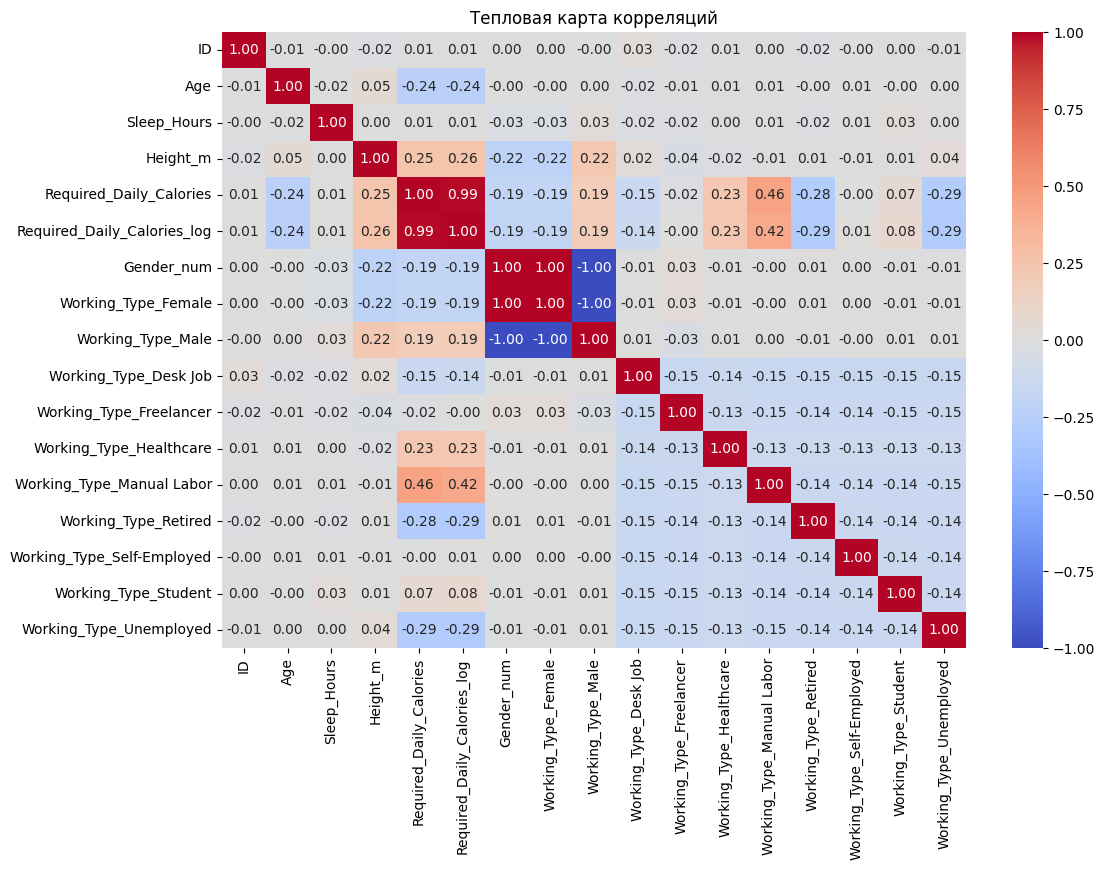

In [205]:
plt.figure(figsize=(12,8))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Тепловая карта корреляций")
plt.show()


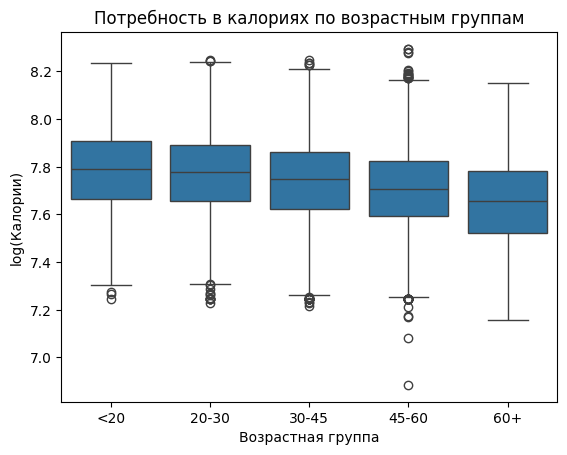

In [206]:
df1['Age_Group'] = pd.cut(df['Age'], bins=[0, 20, 30, 45, 60, 100], 
                         labels=['<20', '20-30', '30-45', '45-60', '60+'])

sns.boxplot(data=df1, x='Age_Group', y='Required_Daily_Calories_log')
plt.title("Потребность в калориях по возрастным группам")
plt.xlabel("Возрастная группа")
plt.ylabel("log(Калории)")
plt.show()


In [286]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [234]:
X=df1.drop(columns=['Required_Daily_Calories','Required_Daily_Calories_log', 'ID','Age_Group'])

In [261]:
X = X.fillna(0)

In [262]:
y=y.fillna(0)

In [263]:
y=df1['Required_Daily_Calories']

In [264]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [275]:
y_test=y_test.fillna(0)

In [276]:
model=LinearRegression()

In [277]:
X_train = X_train.fillna(0)


In [278]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10200 entries, 0 to 10199
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         10200 non-null  float64
 1   Sleep_Hours                 10200 non-null  float64
 2   Height_m                    10200 non-null  float64
 3   Gender_num                  10200 non-null  int64  
 4   Working_Type_Female         10200 non-null  bool   
 5   Working_Type_Male           10200 non-null  bool   
 6   Working_Type_Desk Job       10200 non-null  bool   
 7   Working_Type_Freelancer     10200 non-null  bool   
 8   Working_Type_Healthcare     10200 non-null  bool   
 9   Working_Type_Manual Labor   10200 non-null  bool   
 10  Working_Type_Retired        10200 non-null  bool   
 11  Working_Type_Self-Employed  10200 non-null  bool   
 12  Working_Type_Student        10200 non-null  bool   
 13  Working_Type_Unemployed     102

In [279]:
X.shape

(10200, 14)

In [280]:
y_train = y_train.fillna(0)

In [281]:
model.fit(X_train,y_train)

LinearRegression()

In [282]:
y_pred = model.predict(X_test)

In [283]:
mse=mean_squared_error(y_test,y_pred)

In [284]:
print(mse)

86863.8910501195


In [287]:
mae=mean_absolute_error(y_test,y_pred)

In [288]:
print(mae)

230.10305905939066
